In [2]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

path = "S001R03.edf"
signals, signal_headers, header = highlevel.read_edf(path)
fs = signal_headers[0]['sample_frequency']  # Sampling rate (Hz)
channel_names = [h['label'] for h in signal_headers]  # List of channel names

print(f"Sampling rate: {fs} Hz")
print(f"Channels: {channel_names}")
print(f"Signal shape: {signals.shape}")  # (n_channels, n_samples)

Sampling rate: 160.0 Hz
Channels: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Signal shape: (64, 20000)


In [3]:
# Find indices of C3 and C4
c3_idx = channel_names.index('C3..')
c4_idx = channel_names.index('C4..')

c3_signal = signals[c3_idx, :]
c4_signal = signals[c4_idx, :]

In [4]:
from scipy.signal import butter, filtfilt

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Filter C3 and C4
c3_filtered = bandpass_filter(c3_signal, 0.5, 40, fs)
c4_filtered = bandpass_filter(c4_signal, 0.5, 40, fs)

# Optional: Notch filter (50 Hz)
def notch_filter(data, notch_freq, fs, quality=30):
    nyquist = 0.5 * fs
    freq = notch_freq / nyquist
    b, a = butter(2, [freq - 0.5/quality, freq + 0.5/quality], btype='bandstop')
    return filtfilt(b, a, data)

c3_filtered = notch_filter(c3_filtered, 50, fs)
c4_filtered = notch_filter(c4_filtered, 50, fs)

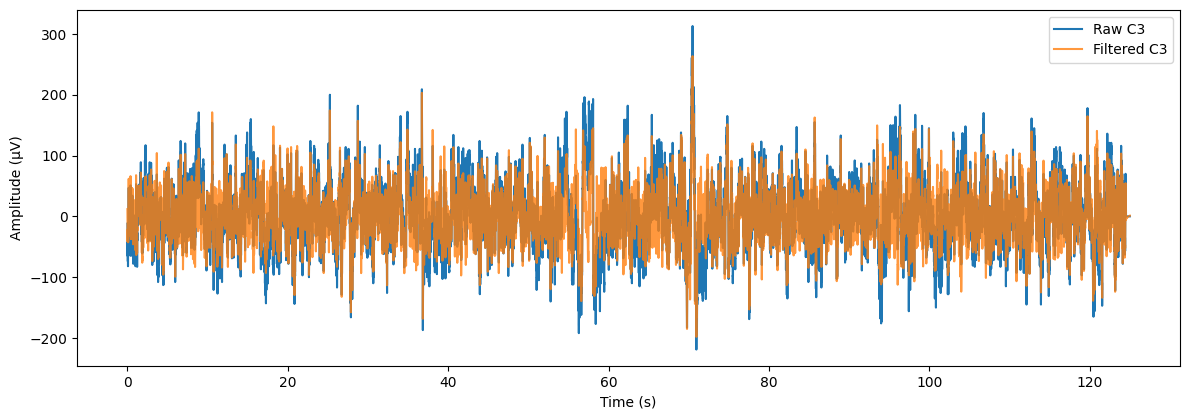

In [11]:
time = np.arange(0, len(c3_signal)) / fs

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(time, c3_signal, label='Raw C3')
plt.plot(time, c3_filtered, label='Filtered C3', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend()

'''plt.subplot(2, 1, 2)
plt.plot(time, c4_signal, label='Raw C4')
plt.plot(time, c4_filtered, label='Filtered C4', alpha=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend()'''
plt.tight_layout()
plt.show()

In [6]:
from pyedflib import EdfReader
import numpy as np
import matplotlib.pyplot as plt

# Open the EDF file
file_path = "S001R03.edf"
reader = EdfReader(file_path)

# Get signal data and headers
n_channels = reader.signals_in_file
signal_labels = reader.getSignalLabels()
fs = reader.getSampleFrequency(0)  # Assumes all channels have same sample rate
signals = np.array([reader.readSignal(i) for i in range(n_channels)])

# Get annotations (events/timestamps)
annotations = reader.readAnnotations()

# Close the file
reader.close()

# Print annotations
print("Annotations (time in seconds, duration, description):")
for onset, duration, description in zip(annotations[0], annotations[1], annotations[2]):
    print(f"{onset:.2f}s - {duration}s: {description}")

# Example output:
# 2.00s - 0.00s: T0
# 4.00s - 0.00s: T1
# 6.00s - 0.00s: T2

Annotations (time in seconds, duration, description):
0.00s - 4.2s: T0
4.20s - 4.1s: T2
8.30s - 4.2s: T0
12.50s - 4.1s: T1
16.60s - 4.2s: T0
20.80s - 4.1s: T1
24.90s - 4.2s: T0
29.10s - 4.1s: T2
33.20s - 4.2s: T0
37.40s - 4.1s: T2
41.50s - 4.2s: T0
45.70s - 4.1s: T1
49.80s - 4.2s: T0
54.00s - 4.1s: T1
58.10s - 4.2s: T0
62.30s - 4.1s: T2
66.40s - 4.2s: T0
70.60s - 4.1s: T1
74.70s - 4.2s: T0
78.90s - 4.1s: T2
83.00s - 4.2s: T0
87.20s - 4.1s: T2
91.30s - 4.2s: T0
95.50s - 4.1s: T1
99.60s - 4.2s: T0
103.80s - 4.1s: T1
107.90s - 4.2s: T0
112.10s - 4.1s: T2
116.20s - 4.2s: T0
120.40s - 4.1s: T1


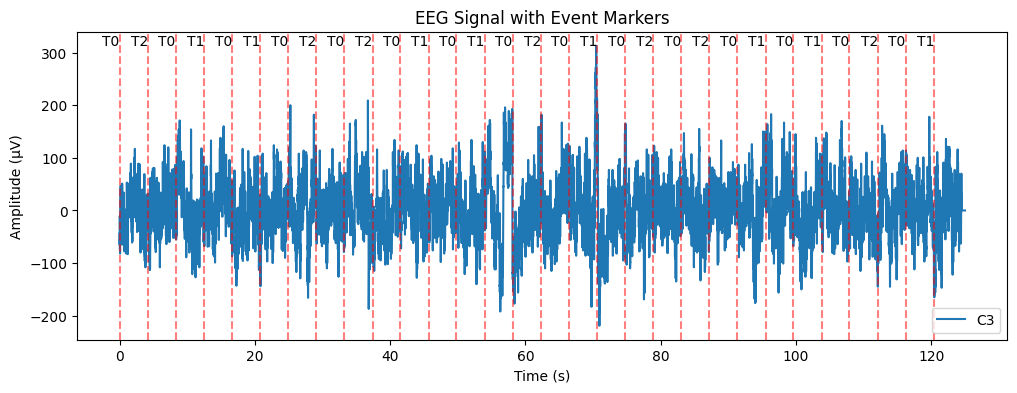

In [7]:
# Plot C3 signal with event markers
c3_idx = signal_labels.index('C3..')
c3_signal = signals[c3_idx]
time = np.arange(len(c3_signal)) / fs

plt.figure(figsize=(12, 4))
plt.plot(time, c3_signal, label='C3')
for onset, _, desc in zip(annotations[0], annotations[1], annotations[2]):
    plt.axvline(onset, color='red', linestyle='--', alpha=0.5)
    plt.text(onset, np.max(c3_signal), desc, ha='right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title('EEG Signal with Event Markers')
plt.legend()
plt.show()

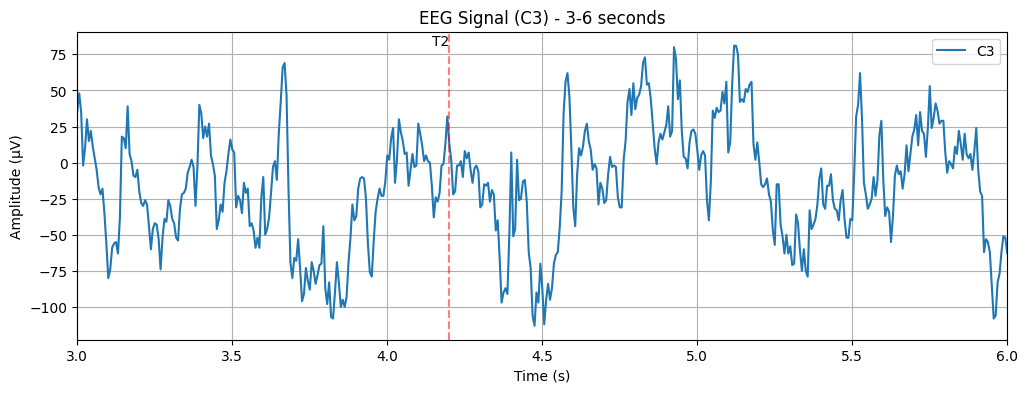

In [8]:
# Plot C3 signal with event markers (10-second window)
c3_idx = signal_labels.index('C3..')
c3_signal = signals[c3_idx]
time = np.arange(len(c3_signal)) / fs  # Create time axis in seconds

# Select a 10-second window (adjust start_time as needed)
start_time = 3
end_time = start_time + 3
window_mask = (time >= start_time) & (time <= end_time)

plt.figure(figsize=(12, 4))
plt.plot(time[window_mask], c3_signal[window_mask], label='C3')

# Plot only markers within this window
for onset, duration, desc in zip(annotations[0], annotations[1], annotations[2]):
    if start_time <= onset <= end_time:  # Only show markers in our window
        plt.axvline(onset, color='red', linestyle='--', alpha=0.5)
        plt.text(onset, np.max(c3_signal[window_mask]), desc, ha='right')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title(f'EEG Signal (C3) - {start_time}-{end_time} seconds')
plt.legend()
plt.xlim(start_time, end_time)  # Force x-axis limits
plt.grid(True)
plt.show()

In [13]:
def plot_signal_with_events(signal, fs, start_time, window_duration): 
    end_time = start_time + window_duration

    # Convert time to samples
    start_sample = int(start_time * fs)
    end_sample = int(end_time * fs)

    # Extract the signal segment
    signal_segment = signal[start_sample:end_sample]

    # Apply Hanning window
    window = np.hanning(len(signal_segment))
    windowed_signal = signal_segment * window

    # Compute FFT
    n = len(signal_segment)
    fft_result = np.fft.fft(windowed_signal)
    fft_magnitude = np.abs(fft_result)[:n//2] * 2 / n  
    fft_magnitude[0] /= 2  # Adjust DC component

    # Frequency axis
    freqs = np.fft.fftfreq(n, 1/fs)[:n//2]

    return freqs, fft_magnitude 

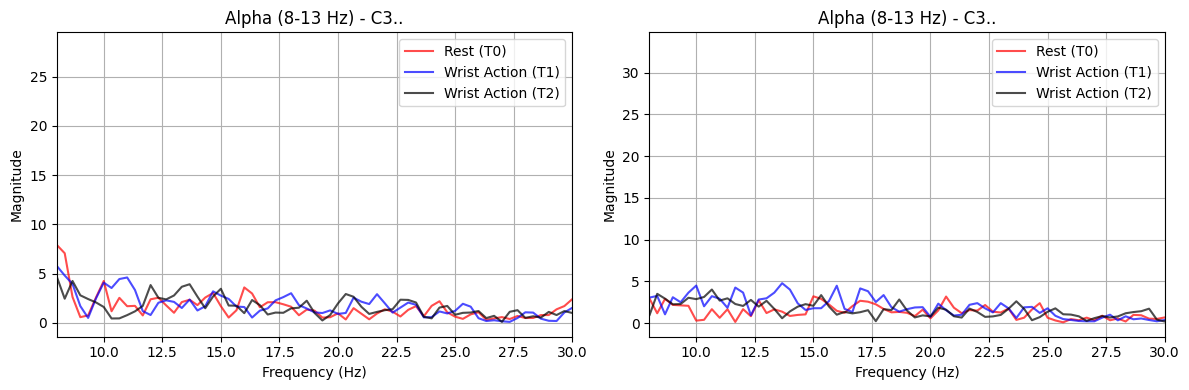

In [14]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

# Load the EDF file
path = "S001R03.edf"
signals, signal_headers, header = highlevel.read_edf(path)
fs = signal_headers[0]['sample_frequency']  # Sampling rate (Hz)
channel_names = [h['label'] for h in signal_headers]  # List of channel names

# Select a channel to analyze (e.g., 'C4..')
channel_idx = channel_names.index('C3..')  
signal = signals[channel_idx]
channel_name = channel_names[channel_idx]

s1 = plot_signal_with_events(signal, fs, 11, 3)
s2 = plot_signal_with_events(signal, fs, 7, 3 )
s3 = plot_signal_with_events(signal, fs, 3, 3)

s4 = plot_signal_with_events(signal, fs, 90, 3)#t0
s5 = plot_signal_with_events(signal, fs, 94, 3)#t1
s6 = plot_signal_with_events(signal, fs, 86, 3) #t2



# Create a figure with two subplots (side by side)
plt.figure(figsize=(12, 4))  # Wider figure to fit both subplots

plt.subplot(1, 2, 1)  
plt.plot(s2[0], s2[1], label='Rest (T0)', color='red', alpha=0.7)
plt.plot(s1[0], s1[1], label='Wrist Action (T1)', color='blue', alpha=0.7)
plt.plot(s3[0], s3[1], label='Wrist Action (T2)', color='black', alpha=0.7)
plt.title(f'Alpha (8-13 Hz) - {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(8, 30)  # Wider range to show full spectrum
plt.legend(loc='upper right')  # Add legend

plt.subplot(1, 2, 2)  
plt.plot(s4[0], s4[1], label='Rest (T0)', color='red', alpha=0.7)
plt.plot(s5[0], s5[1], label='Wrist Action (T1)', color='blue', alpha=0.7)
plt.plot(s6[0], s6[1], label='Wrist Action (T2)', color='black', alpha=0.7)
plt.title(f'Alpha (8-13 Hz) - {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(8, 30)  # Wider range to show full spectrum
plt.legend(loc='upper right')  # Add legend
plt.tight_layout()  # Prevent overlapping labels
plt.show()

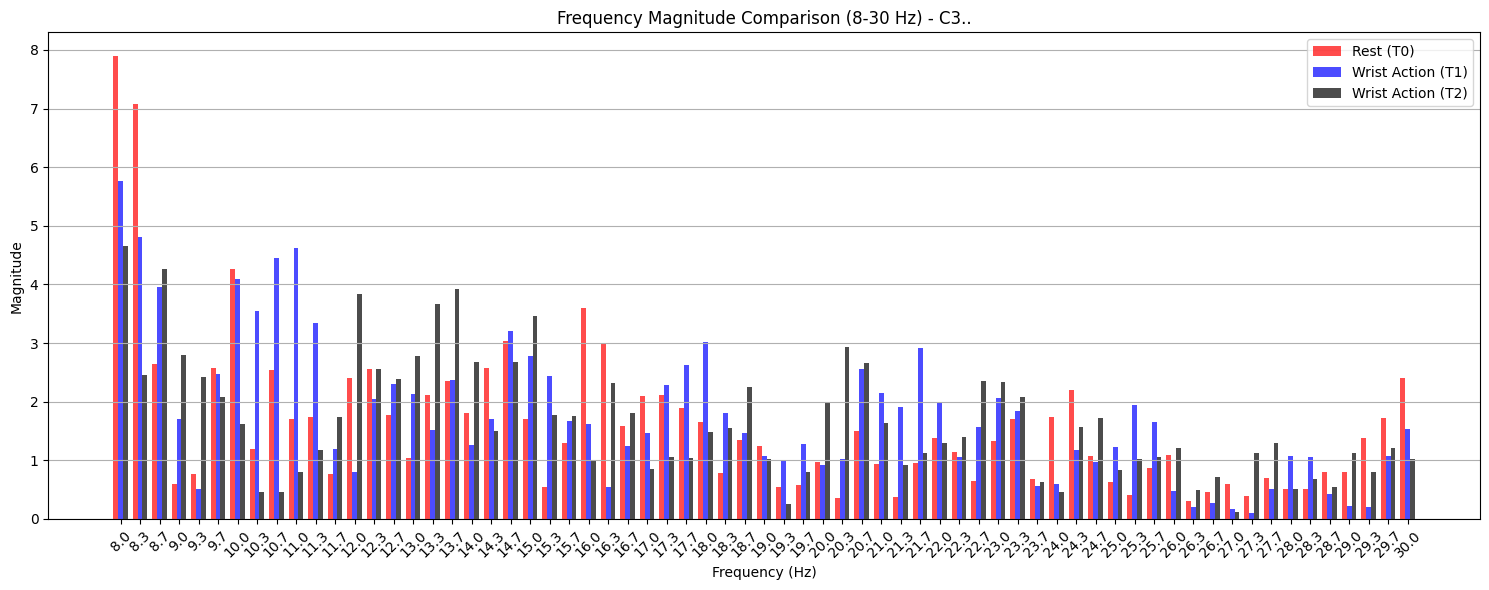

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual FFT magnitudes and freqs)
# freqs = s1[0]  # Frequency bins (X-axis)
# s1_mag = s1[1]  # Magnitude for Wrist Action T1
# s2_mag = s2[1]  # Magnitude for Rest T0
# s3_mag = s3[1]  # Magnitude for Wrist Action T2

# Focus on the Alpha/Beta range (8-30 Hz)
mask = (s1[0] >= 8) & (s1[0] <= 30)  # Filter frequencies
freqs = s1[0][mask]
s1_mag = s1[1][mask]  # Wrist Action T1
s2_mag = s2[1][mask]  # Rest T0
s3_mag = s3[1][mask]  # Wrist Action T2

# Plot settings
bar_width = 0.25  # Width of each bar
x = np.arange(len(freqs))  # X-axis positions

plt.figure(figsize=(15, 6))

# Plot grouped bars
plt.bar(x - bar_width, s2_mag, width=bar_width, label='Rest (T0)', color='red', alpha=0.7)
plt.bar(x, s1_mag, width=bar_width, label='Wrist Action (T1)', color='blue', alpha=0.7)
plt.bar(x + bar_width, s3_mag, width=bar_width, label='Wrist Action (T2)', color='black', alpha=0.7)

# Customize plot
plt.title(f'Frequency Magnitude Comparison (8-30 Hz) - {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xticks(x, freqs.round(1), rotation=45)  # Show frequency bins on X-axis
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
from pyedflib import highlevel
import numpy as np
import matplotlib.pyplot as plt

# Load the EDF file
path = "S001R03.edf"
signals, signal_headers, header = highlevel.read_edf(path)
fs = signal_headers[0]['sample_frequency']  # Sampling rate (Hz)
channel_names = [h['label'] for h in signal_headers]  # List of channel names

# Select a channel to analyze (e.g., 'C4..')
channel_idx = channel_names.index('C3..')  
signal = signals[channel_idx]
channel_name = channel_names[channel_idx]

s1 = plot_signal_with_events(signal, fs, 11, 3)
s2 = plot_signal_with_events(signal, fs, 7, 3 )
s3 = plot_signal_with_events(signal, fs, 3, 3)



# Create a figure with two subplots (side by side)
plt.figure(figsize=(12, 4))  # Wider figure to fit both subplots

# Subplot 1: Alpha band (8-13 Hz)
plt.subplot(1, 2, 1)  
plt.plot(s2[0], s2[1], label='Rest (T0)', color='red', alpha=0.7)
plt.plot(s1[0], s1[1], label='Wrist Action (T1)', color='blue', alpha=0.7)
plt.plot(s3[0], s3[1], label='Wrist Action (T2)', color='black', alpha=0.7)
plt.title(f'Alpha (8-13 Hz) - {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0.5, 40)  # Wider range to show full spectrum
plt.legend(loc='upper right')  # Add legend

"""# Subplot 2: Beta band (14-30 Hz)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(freqs, fft_magnitude)
plt.title(f'Beta (14-30 Hz) - {channel_name}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(14, 30)  # Focus on beta band
"""
plt.tight_layout()  # Prevent overlapping labels
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import butter, filtfilt
from pyedflib import highlevel

# Load the EDF file
path = "S001R03.edf"
signals, signal_headers, header = highlevel.read_edf(path)
fs = signal_headers[0]['sample_frequency']  # Sampling rate (Hz)
channel_names = [h['label'] for h in signal_headers]  # List of channel names

# Find indices of C3 and C4
c3_idx = channel_names.index('C3..')
c4_idx = channel_names.index('C4..')
c3_signal = signals[c3_idx, :]
c4_signal = signals[c4_idx, :]

# Filtering functions
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

def notch_filter(data, notch_freq, fs, quality=30):
    nyquist = 0.5 * fs
    freq = notch_freq / nyquist
    b, a = butter(2, [freq - 0.5/quality, freq + 0.5/quality], btype='bandstop')
    return filtfilt(b, a, data)

# Apply filters
c3_filtered = bandpass_filter(c3_signal, 0.5, 40, fs)
c4_filtered = bandpass_filter(c4_signal, 0.5, 40, fs)
c3_filtered = notch_filter(c3_filtered, 50, fs)
c4_filtered = notch_filter(c4_filtered, 50, fs)

# Parse annotations (manually from your description)
annotations = [
    (0.00, 4.2, 'T0'), (4.20, 4.1, 'T2'), (8.30, 4.2, 'T0'), (12.50, 4.1, 'T1'),
    (16.60, 4.2, 'T0'), (20.80, 4.1, 'T1'), (24.90, 4.2, 'T0'), (29.10, 4.1, 'T2'),
    (33.20, 4.2, 'T0'), (37.40, 4.1, 'T2'), (41.50, 4.2, 'T0'), (45.70, 4.1, 'T1'),
    (49.80, 4.2, 'T0'), (54.00, 4.1, 'T1'), (58.10, 4.2, 'T0'), (62.30, 4.1, 'T2'),
    (66.40, 4.2, 'T0'), (70.60, 4.1, 'T1'), (74.70, 4.2, 'T0'), (78.90, 4.1, 'T2'),
    (83.00, 4.2, 'T0'), (87.20, 4.1, 'T2'), (91.30, 4.2, 'T0'), (95.50, 4.1, 'T1'),
    (99.60, 4.2, 'T0'), (103.80, 4.1, 'T1'), (107.90, 4.2, 'T0'), (112.10, 4.1, 'T2'),
    (116.20, 4.2, 'T0'), (120.40, 4.1, 'T1')
]

# Convert annotations to events array (sample numbers)
events = []
for onset, duration, description in annotations:
    sample = int(onset * fs)
    events.append([sample, 0, description])

# Create event dictionary
event_dict = {'T0': 'Rest', 'T1': 'Left Fist', 'T2': 'Right Fist'}

# STFT parameters
nperseg = int(fs * 1.0)  # 1-second windows
noverlap = int(fs * 0.5)  # 50% overlap
nfft = nperseg * 2       # Zero padding

# Function to compute STFT for epochs
def compute_epoch_stft(data, events, event_type, tmin=0, tmax=4, fs=160):
    """Compute STFT for specific event type"""
    # Get all events of this type
    event_samples = [e[0] for e in events if e[2] == event_type]
    
    # Initialize list to store STFT results
    stft_results = []
    
    for sample in event_samples:
        # Extract epoch
        start = sample + int(tmin * fs)
        end = sample + int(tmax * fs)
        epoch = data[start:end]
        
        # Compute STFT
        f, t, Zxx = signal.stft(epoch, fs=fs, window='hann',
                               nperseg=nperseg, noverlap=noverlap, nfft=nfft)
        stft_results.append(np.abs(Zxx))  # Store magnitude
        
    # Average across trials
    avg_stft = np.mean(stft_results, axis=0)
    return f, t, avg_stft

# Compute STFT for each condition (C3 and C4)
conditions = ['T0', 'T1', 'T2']
results = {}

for cond in conditions:
    # C3 results
    f, t, c3_stft = compute_epoch_stft(c3_filtered, events, cond)
    # C4 results
    _, _, c4_stft = compute_epoch_stft(c4_filtered, events, cond)
    
    results[cond] = {
        'frequencies': f,
        'times': t,
        'C3': c3_stft,
        'C4': c4_stft
    }

# Visualization
plt.figure(figsize=(15, 10))

for i, cond in enumerate(conditions):
    # Plot C3
    plt.subplot(3, 2, i*2+1)
    plt.pcolormesh(results[cond]['times'], results[cond]['frequencies'], 
                  results[cond]['C3'], shading='gouraud', vmin=0, 
                  vmax=np.percentile(results[cond]['C3'], 95))
    plt.colorbar(label='Magnitude')
    plt.title(f'{event_dict[cond]} - C3')
    plt.ylabel('Frequency [Hz]')
    plt.ylim([8, 30])  # Focus on mu and beta bands
    
    # Plot C4
    plt.subplot(3, 2, i*2+2)
    plt.pcolormesh(results[cond]['times'], results[cond]['frequencies'], 
                  results[cond]['C4'], shading='gouraud', vmin=0, 
                  vmax=np.percentile(results[cond]['C4'], 95))
    plt.colorbar(label='Magnitude')
    plt.title(f'{event_dict[cond]} - C4')
    plt.ylim([8, 30])  # Focus on mu and beta bands

plt.tight_layout()
plt.show()

# Compute Laterality Index (LI) for motor imagery tasks
def laterality_index(c3_power, c4_power):
    """Compute (C3 - C4)/(C3 + C4)"""
    return (c3_power - c4_power) / (c3_power + c4_power + 1e-10)  # Small constant to avoid division by zero

# Focus on mu band (8-13 Hz) during movement (1-3s after onset)
mu_band = (results['T1']['frequencies'] >= 8) & (results['T1']['frequencies'] <= 13)
movement_window = (results['T1']['times'] >= 1) & (results['T1']['times'] <= 3)

# Compute LI for left and right fist movements
li_left = laterality_index(
    np.mean(results['T1']['C3'][mu_band][:, movement_window]),
    np.mean(results['T1']['C4'][mu_band][:, movement_window])
)

li_right = laterality_index(
    np.mean(results['T2']['C3'][mu_band][:, movement_window]),
    np.mean(results['T2']['C4'][mu_band][:, movement_window])
)

print(f"Laterality Index (Left Fist): {li_left:.2f}")
print(f"Laterality Index (Right Fist): {li_right:.2f}")

# Expected pattern:
# Left fist should show negative LI (C4 > C3)
# Right fist should show positive LI (C3 > C4)